In [1]:
import pandas as pd
import glob
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt


In [ ]:
def cohend(d1, d2):
        # calculate the size of samples
        n1, n2 = len(d1), len(d2)
        # calculate the variance of the samples
        s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
        # calculate the pooled standard deviation
        s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        # calculate the means of the samples
        u1, u2 = np.mean(d1), np.mean(d2)
        # calculate the effect size
        return (u1 - u2) / s

In [2]:
WOMEN = "#ff876d"
WOMEN_POS = "#ffcea8"
WOMEN_NEG = "#cb4d36"
MEN = "#009ce4"
MEN_POS = "#76efff"#"#b8e1ff"
MEN_NEG = "#056497"
ACCENT = "#d2518f"
ACCENT2 = "#987ad3"

In [2]:
# Create dataset
dfs = []
for file in glob.glob("201*.csv"):
    dfs.append(pd.read_csv(file).drop(columns=["Unnamed: 0"]))
df = pd.concat(dfs)

## Remove corruption of dataset
# df = df[~df.subreddit.isna()]
# df = df.loc[~df.subreddit.str.startswith("Q")] 

singles = df.groupby('id').filter(lambda group: len(group) == 1) # look only at comments that comment on ONE politician -- easier?

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,5,6,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_n

In [21]:
# Create groups for 2-way investigation
left = ['Liberal', 'SocialDemocracy', 'socialism', 'alltheleft', 'neoliberal', 'democrats']
right = ['Libertarian', 'Conservative', 'Republican']
alt_right = ['The_Donald']
# reformat df
test = singles[['subreddit', 'sex', 'Valence', 'Arousal', 'Dominance']]
maps = {}
for sr in left:
    maps[sr] = 'left'
for sr in right:
    maps[sr] = 'right'
maps['The_Donald'] = 'alt_right'
test['group'] = test['subreddit'].map(maps)
test = test[test['sex'].isin(['male','female'])]

<ipython-input-21-8cfe890995cc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['group'] = test['subreddit'].map(maps)


In [13]:
# Get averages.
print("Valence")
print(singles[singles['sex'] == 'female']['Valence'].mean(), singles[singles['sex'] == 'male']['Valence'].mean())
print()
print("Arousal")
print(singles[singles['sex'] == 'female']['Arousal'].mean(), singles[singles['sex'] == 'male']['Arousal'].mean())
print()
print("Dominance")
print(singles[singles['sex'] == 'female']['Dominance'].mean(), singles[singles['sex'] == 'male']['Dominance'].mean())

Valence
0.3145133253626906 0.3249993051900356

Arousal
0.23722487155475608 0.2497584202822208

Dominance
0.2848382493193496 0.29975040305150696


In [12]:
from scipy.stats import shapiro

# Test for normality

singles['Valence_n'] = np.nan
singles['Valence_n'].loc[(singles['sex']== 'female')] = singles['Valence'].loc[(singles['sex']== 'female')] - singles['Valence'].loc[(singles['sex']== 'female')].mean()
singles['Valence_n'].loc[(singles['sex']== 'male')] = singles['Valence'].loc[(singles['sex']== 'male')] - singles['Valence'].loc[(singles['sex']== 'male')].mean()
print(shapiro(singles.Valence_n[singles['Valence_n'].notna()]))

singles['Arousal_n'] = np.nan
singles['Arousal_n'].loc[(singles['sex']== 'female')] = singles['Arousal'].loc[(singles['sex']== 'female')] - singles['Arousal'].loc[(singles['sex']== 'female')].mean()
singles['Arousal_n'].loc[(singles['sex']== 'male')] = singles['Arousal'].loc[(singles['sex']== 'male')] - singles['Arousal'].loc[(singles['sex']== 'male')].mean()
print(shapiro(singles.Arousal_n[singles['Arousal_n'].notna()]))

singles['Dominance_n'] = np.nan
singles['Dominance_n'].loc[(singles['sex']== 'female')] = singles['Dominance'].loc[(singles['sex']== 'female')] - singles['Dominance'].loc[(singles['sex']== 'female')].mean()
singles['Dominance_n'].loc[(singles['sex']== 'male')] = singles['Dominance'].loc[(singles['sex']== 'male')] - singles['Dominance'].loc[(singles['sex']== 'male')].mean()
print(shapiro(singles.Dominance_n[singles['Dominance_n'].notna()]))

C:\Users\vanki\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\vanki\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8512732982635498, pvalue=0.0)
ShapiroResult(statistic=0.8715411424636841, pvalue=0.0)
ShapiroResult(statistic=0.8526183366775513, pvalue=0.0)


In [14]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(singles[singles['sex'] == 'female']['Valence'], singles[singles['sex'] == 'male']['Valence']))
print(mannwhitneyu(singles[singles['sex'] == 'female']['Arousal'], singles[singles['sex'] == 'male']['Arousal']))
print(mannwhitneyu(singles[singles['sex'] == 'female']['Dominance'], singles[singles['sex'] == 'male']['Dominance']))

MannwhitneyuResult(statistic=3422634899326.5, pvalue=0.0)
MannwhitneyuResult(statistic=3340525152925.5, pvalue=0.0)
MannwhitneyuResult(statistic=3335727962838.0, pvalue=0.0)


In [ ]:
## Full t-test results, with cohens d
print("Valence")
print("Female ",df[df['sex'] == 'female']['Valence'].mean(), "Male ",df[df['sex'] == 'male']['Valence'].mean(), "+-", df[df.sex == 'male'].Valence.std())
print(ttest_ind(df[df.sex == 'female'].Valence.dropna(), df[df.sex == 'male'].Valence.dropna()), cohend(df[df.sex == 'female'].Valence.dropna(), df[df.sex == 'male'].Valence.dropna()))
print("Dominance")
print("Female ",df[df['sex'] == 'female']['Dominance'].mean(), "Male ", df[df['sex'] == 'male']['Dominance'].mean(), "+-", df[df.sex == 'male'].Dominance.std())
print(ttest_ind(df[df.sex == 'female'].Dominance.dropna(), df[df.sex == 'male'].Dominance.dropna()), cohend(df[df.sex == 'female'].Dominance.dropna(), df[df.sex == 'male'].Dominance.dropna()))
df.dropna(subset=['group'])[['Valence','Dominance','sex','group']].to_csv("partisan_vad_nt.csv") # save partisan data to analyse in RStudio

## Visualization

(array([8.47040e+04, 6.59467e+05, 1.99071e+05, 3.19810e+04, 2.08811e+05,
        3.38230e+05, 7.28050e+04, 3.74500e+03, 1.39000e+02, 4.30000e+01]),
 array([-0.31543414, -0.21343192, -0.1114297 , -0.00942747,  0.09257475,
         0.19457697,  0.2965792 ,  0.39858142,  0.50058365,  0.60258587,
         0.70458809]),
 <BarContainer object of 10 artists>)

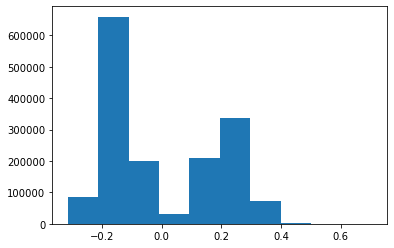

In [37]:
# visualize
plt.hist(test[test['Dominance_n'].notna()]['Dominance_n'])

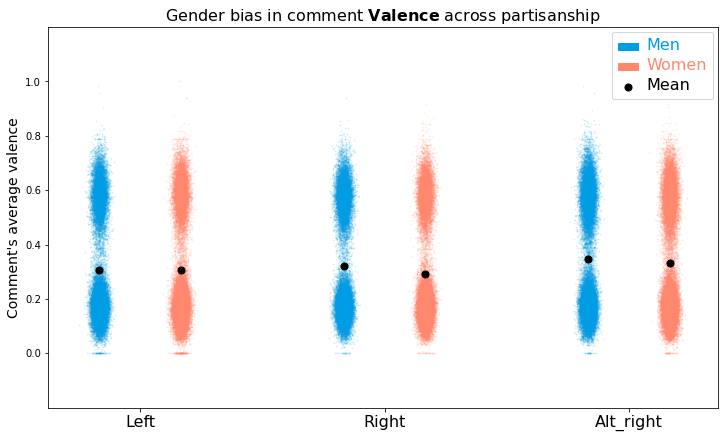

0.3071346646003314 200063
0.3047988210999297 34367
0.3194406249305205 213258
0.29325687915610443 28817
0.346419958791866 950235
0.33230708552417404 172265


In [253]:
vecs = []
colors = []
for g in ['left','right','alt_right']:
    for s in ['male', 'female']:
        vecs.append(test[(test.sex==s) &(test.group==g)]['Valence'])
        if s == 'male':
            colors.append(MEN)
        else:
            colors.append(WOMEN)
means = []
for i in range(6):
    means.append(vecs[i].mean())

plt.figure(figsize=(12,7))
loc = 1
switch = False
for i in range(len(vecs)):
    sample = vecs[i].sample(mn)
    plt.scatter((np.random.normal(0,0.05,sample.shape[0])+[loc]*vecs[i][sample].shape[0]), vecs[i][sample], s=1, color=colors[i], alpha=0.1)
    mns = plt.scatter(loc, means[i], s=50,color='black', label='Mean')
    loc += 1
    if switch:
        loc += 1
    switch = not switch
plt.xticks([1.5,4.5,7.5], ['Left','Right','Alt_right'],size=16)

# Significance lines
# plt.plot([1,4],[means[0],means[2]],color=ACCENT, alpha=0.5)
# plt.plot([1,5],[means[0],means[3]],color=ACCENT, alpha=0.5)
# plt.plot([1,7],[means[0],means[4]],color=ACCENT, alpha=0.5)
# plt.plot([1,8],[means[0],means[5]],color=ACCENT, alpha=0.5)

#plt.plot([1,2],[means[0],means[1]],color="grey", alpha=0.5)
# plt.plot([4,5],[means[2],means[3]],color=ACCENT,linestyle='--', linewidth=1, alpha=0.8)
# plt.plot([7,8],[means[4],means[5]],color=ACCENT,linestyle='--', linewidth=1, alpha=0.8)

# # plt.plot([1,4],[means[0]+0.05,means[2]+0.05],color=ACCENT, alpha=0.8)
# # plt.plot([2,5],[means[1]+0.05,means[3]+0.05],color=ACCENT, alpha=0.8)
# # plt.plot([7,4],[means[4]+0.1,means[2]+0.1],color=ACCENT, alpha=0.8)
# # plt.plot([8,5],[means[5]+0.1,means[3]+0.1],color=ACCENT, alpha=0.8)

# # plt.plot([1,5],[means[0]+0.08,means[3]+0.08],color=ACCENT, alpha=0.8)
# # plt.plot([2,4],[means[1]-0.05,means[2]-0.05],color=ACCENT, alpha=0.8)

# plt.plot([7,5],[means[4]-0.05,means[3]-0.05],color=ACCENT,linestyle='--', linewidth=1, alpha=0.8)
# # plt.plot([8,4],[means[5]-0.1,means[2]-0.1],color=ACCENT, alpha=0.8)

# # plt.plot([7,1],[means[4]-0.05,means[0]-0.05],color=ACCENT, alpha=0.8)
# # plt.plot([8,2],[means[5]-0.08,means[1]-0.08],color=ACCENT, alpha=0.8)
# plt.plot([7,2],[means[4]-0.15,means[1]-0.15],color=ACCENT,linestyle='--', linewidth=1, alpha=0.8)
# plt.plot([8,1],[means[5]-0.1,means[0]-0.1],color=ACCENT, alpha=0.8)

mn_patch = mpatches.Patch(color=MEN, label='Men')
wmn_patch = mpatches.Patch(color=WOMEN, label='Women')
l = plt.legend(handles=[mn_patch,wmn_patch, mns],loc="upper right",borderpad=0.6)
i = 0
for text in l.get_texts():
    if i == 2:
        text.set_color('black')
    else:
        text.set_color(colors[i])
    text.set_size(16)
    i+= 1
plt.margins(y=0.2)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("Comment's average valence", size=14)
plt.title("Gender bias in comment " + r"$\bf{ Valence }$" + " across partisanship", size=16)
plt.savefig("Valence_2.png")
plt.show()

for vec in vecs:
    print(vec.mean(), vec.shape[0])

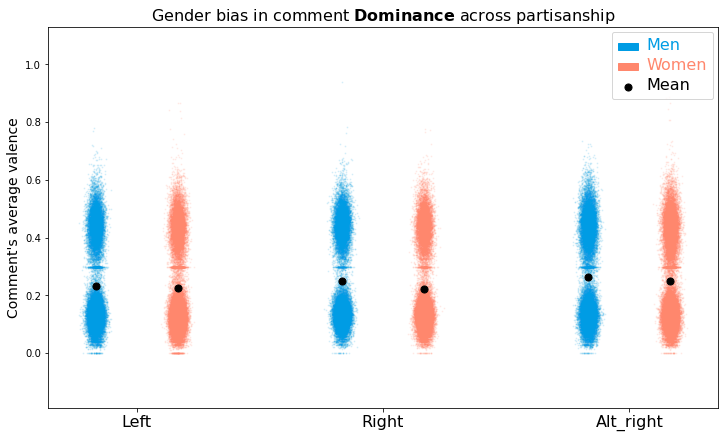

0.23282083955729402 200063
0.22592174561123696 34367
0.24850454233870162 213258
0.22345292677283168 28817
0.2647956018257115 950235
0.25161580086951046 172265


In [254]:
vecs = []
colors = []
for g in ['left','right','alt_right']:
    for s in ['male', 'female']:
        vecs.append(test[(test.sex==s) &(test.group==g)]['Arousal'])
        if s == 'male':
            colors.append(MEN)
        else:
            colors.append(WOMEN)
means = []
for i in range(6):
    means.append(vecs[i].mean())

plt.figure(figsize=(12,7))
loc = 1
switch = False
for i in range(len(vecs)):
    sample = vecs[i].sample(mn).index
    plt.scatter((np.random.normal(0,0.05,sample.shape[0])+[loc]*vecs[i][sample].shape[0]), vecs[i][sample], s=1, color=colors[i], alpha=0.1)
    mns = plt.scatter(loc, means[i], s=50,color='black', label='Mean')
    loc += 1
    if switch:
        loc += 1
    switch = not switch
plt.xticks([1.5,4.5,7.5], ['Left','Right','Alt_right'],size=16)

# Significance lines
# plt.plot([1,4],[means[0],means[2]],color=ACCENT, alpha=0.5)
# plt.plot([1,5],[means[0],means[3]],color=ACCENT, alpha=0.5)
# plt.plot([1,7],[means[0],means[4]],color=ACCENT, alpha=0.5)
# plt.plot([1,8],[means[0],means[5]],color=ACCENT, alpha=0.5)


mn_patch = mpatches.Patch(color=MEN, label='Men')
wmn_patch = mpatches.Patch(color=WOMEN, label='Women')
l = plt.legend(handles=[mn_patch,wmn_patch, mns],loc="upper right",borderpad=0.6)
i = 0
for text in l.get_texts():
    if i == 2:
        text.set_color('black')
    else:
        text.set_color(colors[i])
    text.set_size(16)
    i+= 1
plt.margins(y=0.2)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("Comment's average valence", size=14)
plt.title("Gender bias in comment " + r"$\bf{ Dominance }$" + " across partisanship", size=16)
plt.savefig("Dominance_2.png")
plt.show()

for vec in vecs:
    print(vec.mean(), vec.shape[0])

## Older versions

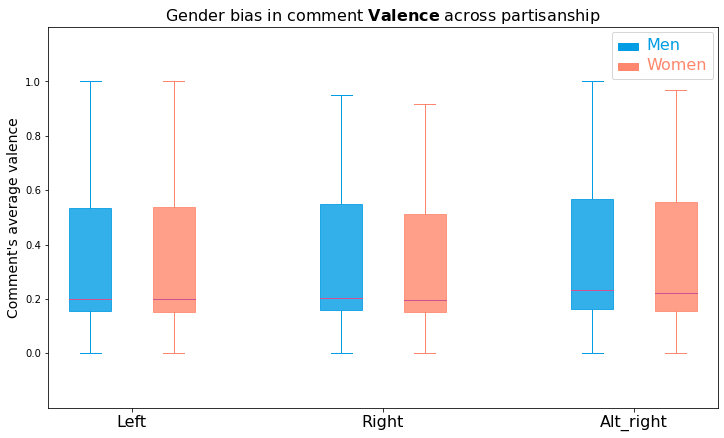

0.3071346646003314 200063
0.3047988210999297 34367
0.3194406249305205 213258
0.29325687915610443 28817
0.346419958791866 950235
0.33230708552417404 172265


In [176]:
import matplotlib.patches as mpatches

vecs = []
colors = []
for g in ['left','right','alt_right']:
    for s in ['male', 'female']:
        vecs.append(test[(test.sex==s) &(test.group==g)]['Valence'])
        if s == 'male':
            colors.append(MEN)
        else:
            colors.append(WOMEN)

plt.figure(figsize=(12,7))
loc = 1
switch = False
for i in range(len(vecs)):
    plt.boxplot(vecs[i], positions=[loc], widths=[0.5], patch_artist=True,
             boxprops=dict(color=colors[i],alpha=0.8, facecolor=colors[i]), medianprops=dict(color=ACCENT),
                whiskerprops=dict(color=colors[i]), capprops=dict(color=colors[i]))
    loc += 1
    if switch:
        loc += 1
    switch = not switch
plt.xticks([1.5,4.5,7.5], ['Left','Right','Alt_right'],size=16)

mn_patch = mpatches.Patch(color=MEN, label='Men')
wmn_patch = mpatches.Patch(color=WOMEN, label='Women')
l = plt.legend(handles=[mn_patch,wmn_patch],loc="upper right",borderpad=0.6)
i = 0
for text in l.get_texts():
    text.set_color(colors[i])
    text.set_size(16)
    i+= 1
plt.margins(y=0.2)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("Comment's average valence", size=14)
plt.title("Gender bias in comment " + r"$\bf{ Valence }$" + " across partisanship", size=16)
plt.savefig("Valence_x.png")
plt.show()

for vec in vecs:
    print(vec.mean(), vec.shape[0])

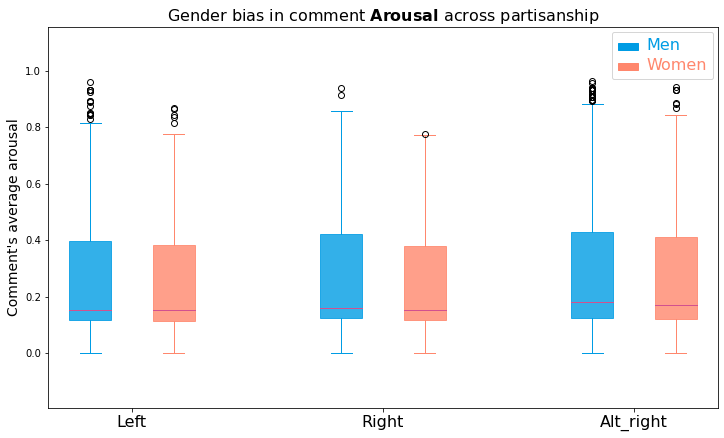

0.23282083955729402 200063
0.22592174561123696 34367
0.24850454233870162 213258
0.22345292677283168 28817
0.2647956018257115 950235
0.25161580086951046 172265


In [177]:
vecs = []
for g in ['left','right','alt_right']:
    for s in ['male', 'female']:
        vecs.append(test[(test.sex==s) &(test.group==g)]['Arousal'])
        
plt.figure(figsize=(12,7))
loc = 1
switch = False
for i in range(len(vecs)):
    plt.boxplot(vecs[i], positions=[loc], widths=[0.5], patch_artist=True,
             boxprops=dict(color=colors[i],alpha=0.8, facecolor=colors[i]), medianprops=dict(color=ACCENT),
                whiskerprops=dict(color=colors[i]), capprops=dict(color=colors[i]))
    loc += 1
    if switch:
        loc += 1
    switch = not switch
plt.xticks([1.5,4.5,7.5], ['Left','Right','Alt_right'],size=16)

mn_patch = mpatches.Patch(color=MEN, label='Men')
wmn_patch = mpatches.Patch(color=WOMEN, label='Women')
l = plt.legend(handles=[mn_patch,wmn_patch],loc="upper right",borderpad=0.6)
i = 0
for text in l.get_texts():
    text.set_color(colors[i])
    text.set_size(16)
    i+= 1
plt.margins(y=0.2)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("Comment's average arousal", size=14)
plt.title("Gender bias in comment " + r"$\bf{ Arousal }$" + " across partisanship", size=16)
plt.savefig("Arousal_x.png")
plt.show()

for vec in vecs:
    print(vec.mean(), vec.shape[0])

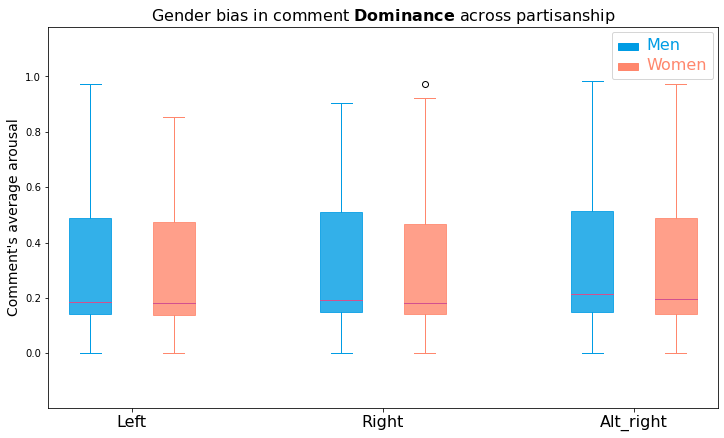

0.28154955006053495 200063
0.2741500380665003 34367
0.2989117054467965 213258
0.26841190647303037 28817
0.31543438703442006 950235
0.2957399369563841 172265


In [178]:
vecs = []
for g in ['left','right','alt_right']:
    for s in ['male', 'female']:
        vecs.append(test[(test.sex==s) &(test.group==g)]['Dominance'])
        
plt.figure(figsize=(12,7))
loc = 1
switch = False
for i in range(len(vecs)):
    plt.boxplot(vecs[i], positions=[loc], widths=[0.5], patch_artist=True,
             boxprops=dict(color=colors[i],alpha=0.8, facecolor=colors[i]), medianprops=dict(color=ACCENT),
                whiskerprops=dict(color=colors[i]), capprops=dict(color=colors[i]))
    loc += 1
    if switch:
        loc += 1
    switch = not switch
plt.xticks([1.5,4.5,7.5], ['Left','Right','Alt_right'],size=16)

mn_patch = mpatches.Patch(color=MEN, label='Men')
wmn_patch = mpatches.Patch(color=WOMEN, label='Women')
l = plt.legend(handles=[mn_patch,wmn_patch],loc="upper right",borderpad=0.6)
i = 0
for text in l.get_texts():
    text.set_color(colors[i])
    text.set_size(16)
    i+= 1
plt.margins(y=0.2)
plt.yticks([0.,0.2,0.4,0.6,0.8,1.0])
plt.ylabel("Comment's average arousal", size=14)
plt.title("Gender bias in comment " + r"$\bf{ Dominance }$" + " across partisanship", size=16)
plt.savefig("Dominance_x.png")
plt.show()

for vec in vecs:
    print(vec.mean(), vec.shape[0])

In [1]:
import pandas as pd
df = pd.read_csv("all_comments.csv")

C:\Users\vanki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Classifier Results
Here are the results based from the output of the pretrained sentiment classifier

In [ ]:
df = pd.read_csv("sentiment_classifier_output.csv")
df[['label','sex']].value_counts()

In [ ]:
values = []

for group in ['left', 'right', 'alt_right']:
    for label in ['POSITIVE', 'NEGATIVE']:
        for gender in ['male', 'female']:
            ct = df[(df['sex'] == gender) & (df['group'] == group) & (df['label'] == label)].shape[0]
            total = df[(df['sex'] == gender) & (df['group'] == group)].shape[0]
            values.append(ct/total)

In [ ]:
## Visualize the results

#%matplotlib inline
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection = "3d")

N = 2
ind = np.arange(2)  # the x locations for the groups
widthx = 0.35       # the width of the bars
widthy = 0.5

#ax.set_xlabel("x")
ax.set_ylabel("Partisanship", size=14, labelpad=10) 
ax.set_xlabel("Sentiment", size=14)
ax.set_zlabel("Percentage of Use", size=14, labelpad=5)
ax.set_xlim3d(-1,2)
ax.set_ylim3d(0,widthy*3) 
ax.set_zlim3d(0,1)
# ax.set_title('Comment sentiment across subreddit and politician gender', size=16)
ax.set_xticks(ind + widthx/ 2)
ax.set_xticklabels( ('Positive', 'Negative'))

ax.set_yticks([widthy/2,widthy*3/2,widthy*2.5])
ax.set_yticklabels( ('Left', 'Right', 'Alt right'))

xpos = [0,0+widthx, 1,1+widthx]*3
ypos = [0]*4 + [0 + widthy]*4 + [2*widthy]*4 
zpos = [0]*4*3

colors = [MEN,WOMEN,MEN,WOMEN]*3

legend_elements = [Patch(facecolor=MEN,
                         label='Men'), Patch(facecolor=WOMEN,
                         label='Women')]

# Create the figure
ax.legend(handles=legend_elements, bbox_to_anchor=(0.4,0.8), loc="upper center")

ax.bar3d(xpos, ypos, zpos, widthx, widthy, values, color=colors, edgecolor='black')
ax.view_init(elev=25, azim=-105)
plt.savefig("classi_sentiment.tif",dpi=300, bbox_inches='tight')
#plt.savefig("classi_sentiment.png", bbox_inches='tight')
plt.show()